# Scoring Probability Forecasters
### How to test probabilistic predictions

Sander van Dijk @ Parkopedia

21 May 2019

# Probabilistic Forecasters

People want to know what will happen in the future. We look into crystal balls, coffee grounds, use tarrot cards, or read palms. Or, maybe more acceptable to some people, we try to extrapolate from past experience and available facts using logic, physics, or perhaps machine learning. A person or system that produces predictions about the future is a _forecaster_.

Some of forecasters we encounter in our daily lifes:

* Bookies predicting the odds of sports outcomes (and adjusting them to their benefit)
* Pollsters guessing who will win the next election
* The weatherman forecasting the probability that it will rain tomorrow

If the forecast is a probability, like in the last example, we talk about a _probabilistic prediction_. 

Further examples of probabilistic predictions:
* The probability of your flight being delayed
* The probability that your opponent will make a certain move
* The probability of finding a parking space in an hour

# How good is a probability?

If somebody tells you the probability that something will occur, how can you test whether he is a good forecaster? Let's take the example of predicting whether it will rain tomorrow. For Tuesday, they make inverse predictions: 10% and 25%. With rain indeed falling on Monday and Tuesday being dry, they both predicted the correct outcome to be more likely than the wrong outcome. Anna would seem to be the better forecaster based on these two days, because she was more certain in her predictions. But what if the next two days they make similar predictions, but the outcomes are the exact inverse, meaning both did bad on those days. Anna now is more decisively wrong. But who is the better forecaster overall? And is either of them better than Carlos, who just predicted 50% all round, which is correct over all 4 days, but probably also not very useful.

Pick your favourite rain forecaster!

| Day | Anna | Robert | Carlos | Outcome |
|-----|------|-----|---------|---------|
| Monday    | 90% | 75% | 50% | 🌧️ |
| Tuesday   | 10% | 25% | 50% | 🌞 |
| Wednesday | 90% | 75% | 50% | 🌞 |
| Thursday  | 10% | 25% | 50% | 🌧️ |


# First observations
* It is not possible to answer:

    * Is this probability correct?
    * Is this forecaster accurate at 95%?
    
* Judgement should not be based on a small set of examples
* It is possible to debate about what a probability _means_... but we won't
* We _can_ develop some ideas about what makes a forecast useful and turn those into concrete tests

If you are interested in the philospy of the interpreteation of probabilities, you can make your way through [the entry on this topic in the Stanford Encyclopedia of Philosopyhy](https://plato.stanford.edu/entries/probability-interpret/). If you have heard the terms 'frequentist' and 'Baysian' before, you probably know why we won't touch that here..

# Intuition 1: Calibration

One of the first ideas that many people develop when talking about how good a probabilistic forecaster is, is often phrased along the lines of:

> Out of all the times you predicted something to happen with 70% chance,<br>
> it should indeed have happened 7 out of 10 times.

This idea is called 'calibration', and a forecaster who provides predictions that match the relative frequency of occurance in this way is said to be 'well calibrated.

In [14]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import random
import numpy as np

def calibration_example(forecaster):
    buckets_green_ratios = np.arange(0.1, 1.1, 0.1)
    n_draws = 100
    def predict(bucket):
        if forecaster == "calibrated":
            return buckets_green_ratios[bucket]
        
    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure()
    ax = plt.axes(xlim=(-0.05, 1.1), ylim=(0, 15))
    print(ax.plot([], [], lw=1))
    scatter = ax.scatter(x=[], y=[], c=[])
    draws = {"predictions": [0.1, 0.1, 0.2], "outcomes": [1, 0, 1]}

    def draws_to_points():
        n_points_per_row = 2
        dist_between_points = 1 / n_points_per_row
        x_start = dist_between_points / 2
        cur_pos = np.zeros((len(buckets_green_ratios), 2))
        
        xs = []
        ys = []
        cs = []
        for pred, outc in zip(draw["predictions"], dra["outcomes"]):
            bucket = int(pred * 10) - 1
            y_idx, x_idx = cur_pos[bucket]
            x = bucket + x_start + x_idx * dist_between_points
            y = y_idx * dist_between_points
            
            xs.append(x)
            ys.append(y)
            cs.append("green" if outc == 1 else "red")
            
            x_idx += 1
            if x_idx > n_points_per_row:
                y_idx += 1
                x_idx = 0
        
        return {"x": xs, "y": ys, c: "cs"}
    
    ax.set_data(draws_to_points)
    
#     # Initialization function: plot the background of each frame
#     def init():
#         scatter.set_data(x=[], y=[], c=[])
#         draws = []
#         return line,

#     # Animation function which updates figure data.  This is called sequentially
#     def animate(i):
#         line.set_data(x, u[i,:])
#         return line,

#     # Call the animator.  blit=True means only re-draw the parts that have changed.
#     anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                    frames=Nt, interval=20, blit=True)

#     plt.close(anim._fig)

#     # Call function to display the animation
#     HTML(anim.to_html5_video())

AttributeError: 'AxesSubplot' object has no attribute 'set_data'

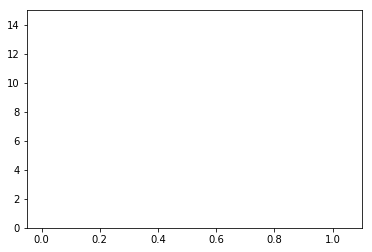

In [15]:
calibration_example("calibrated")